# Kunskapskontroll

### Fyll i uppgifterna nedan innan du lämnar in på LearnPoint: 
Namn på samtliga gruppmedlemmar: 

Marcus Turesson, Pontus Paulsson, Jonathan Karlsson, Rasmus Hellgren, Tommy Wang

# Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Below, set your own path where you have stored the data file. 
housing = pd.read_csv("housing.csv")

In [3]:
df = pd.DataFrame(housing)

## EDA

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Total_bedrooms is missing values so we are dropping those columns to clean the dataset

#### Rensa null-värden

In [6]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Räkna ut snitt total room och snitt bedroom per kluster

In [7]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

## Ändra ocean proximity till kategorier

In [8]:
# Omvandla den kategoriska variabeln ocean_proximity till numeriska kategorier med 'pd.get_dummies'
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

## Ta ut Median_house_value till y

In [9]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

## Train Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Träna modeller och utvärdera

In [11]:
# Träna en linjär regressionsmodell
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Träna en Random Forest modell
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Förutsägelser och utvärdering för linjär regression
y_pred_lin = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_rmse = np.sqrt(lin_mse)

# Förutsägelser och utvärdering för Random Forest
y_pred_rf = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)

In [12]:
print("Linear Regression RMSE:", lin_rmse)
print("Random Forest RMSE:", rf_rmse)

Linear Regression RMSE: 72668.53837868222
Random Forest RMSE: 50356.59653064188


### View a graph of all houses

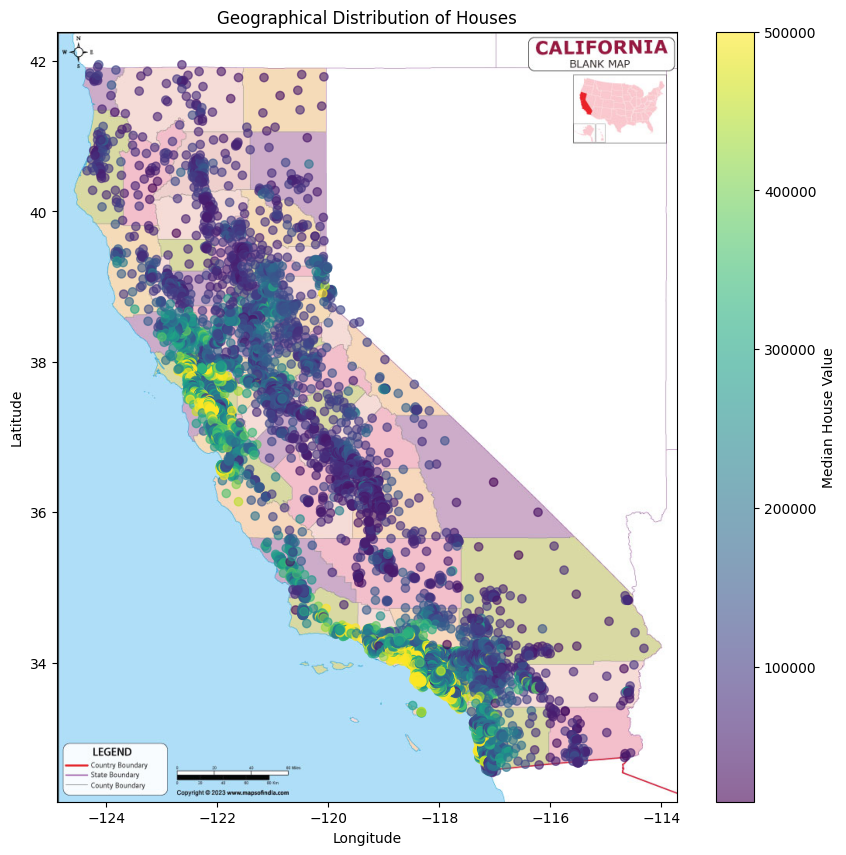

In [13]:
plt.figure(figsize=(10, 10))

# Backgroud image
background_img = mpimg.imread('./pictures/california-map.jpg')
extent = [-124.48, -114.13, 32.53, 42.01]
scale_factor = 1.08  # Adjust the scale factor as needed for the desired enlargement
new_extent = [
    extent[0] - (extent[1] - extent[0]) * (scale_factor - 1) / 2,
    extent[1] + (extent[1] - extent[0]) * (scale_factor - 1) / 2,
    extent[2] - (extent[3] - extent[2]) * (scale_factor - 1) / 2,
    extent[3] + (extent[3] - extent[2]) * (scale_factor - 1) / 2
]
plt.imshow(background_img, extent=new_extent, aspect='auto')

# Scatter plot
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Houses')
plt.show()

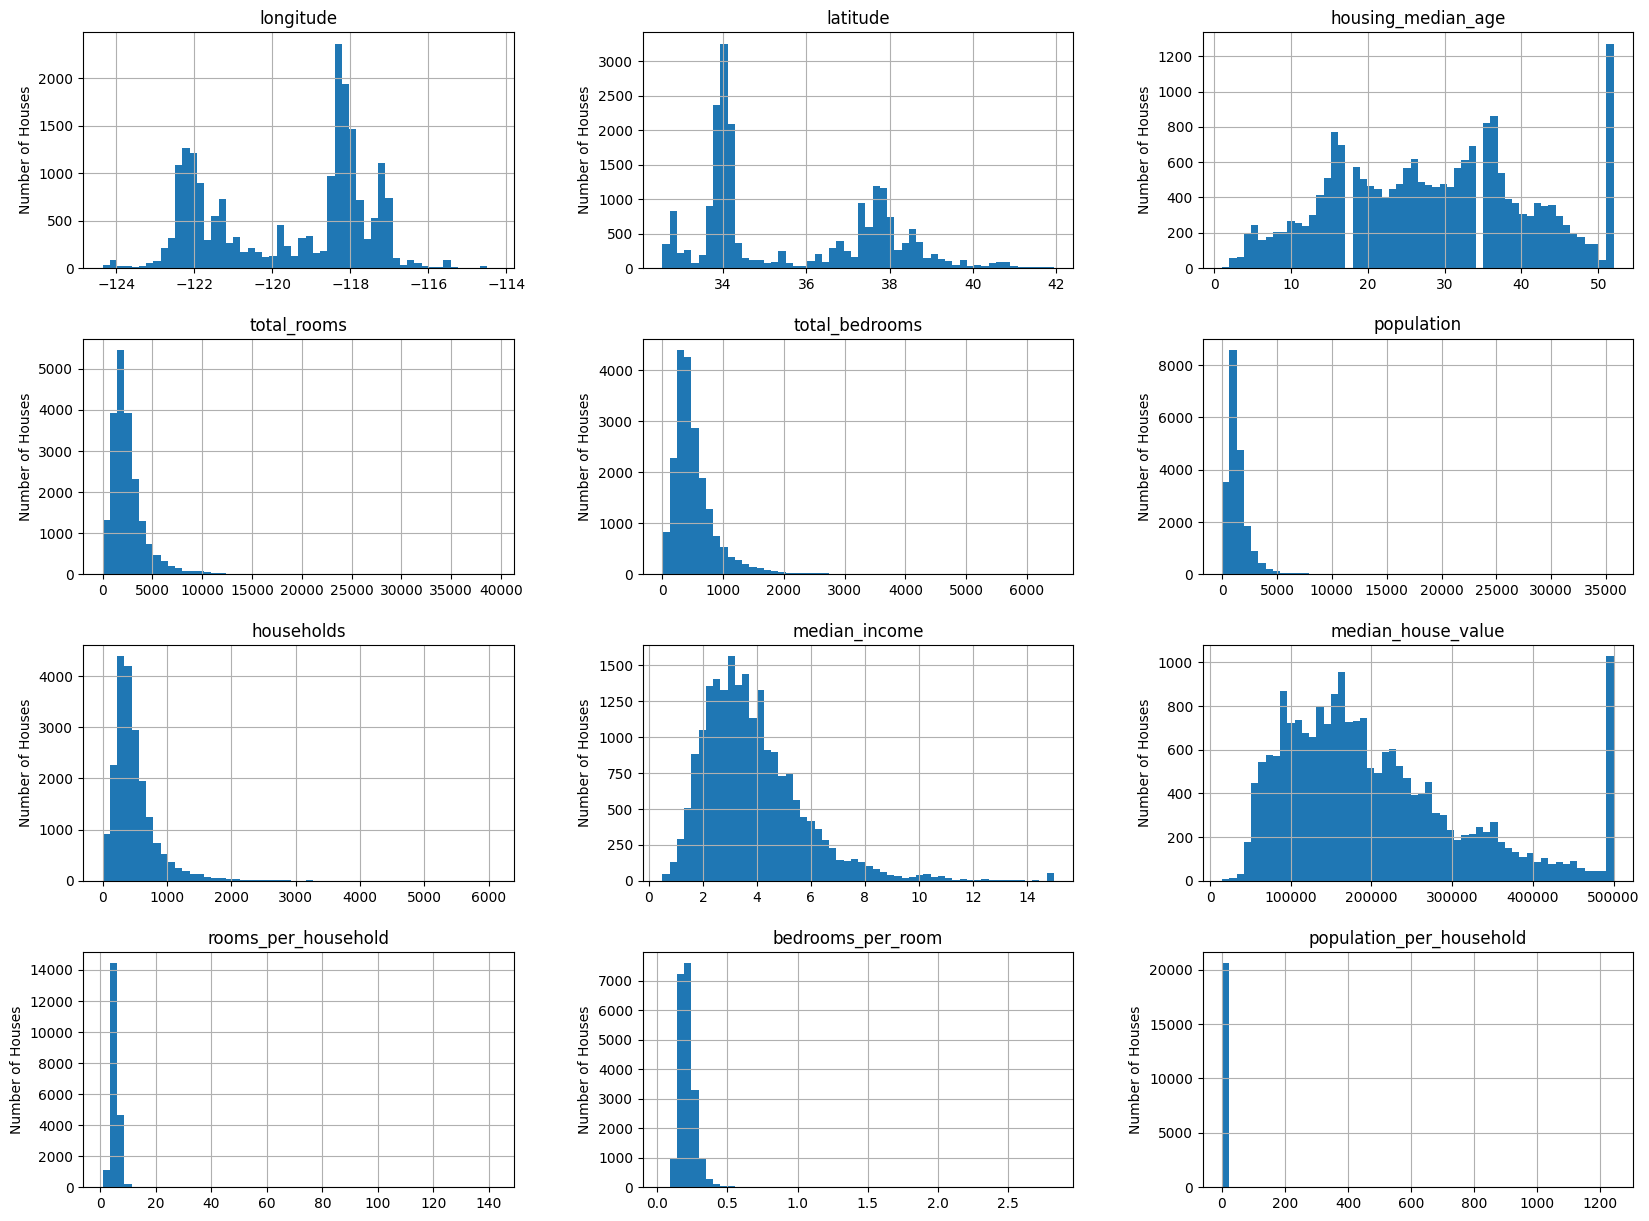

In [14]:
# Histogrammen hjälper till att förstå fördelningen och spridningen av de numeriska variablerna i datasetet.

df.hist(bins=54, figsize=(20, 15)) # Skapar histogram för alla numeriska kolumner i df och en figurstorlek på 20x15.

for ax in plt.gcf().axes:
    ax.set_ylabel('Number of Houses')

plt.show()

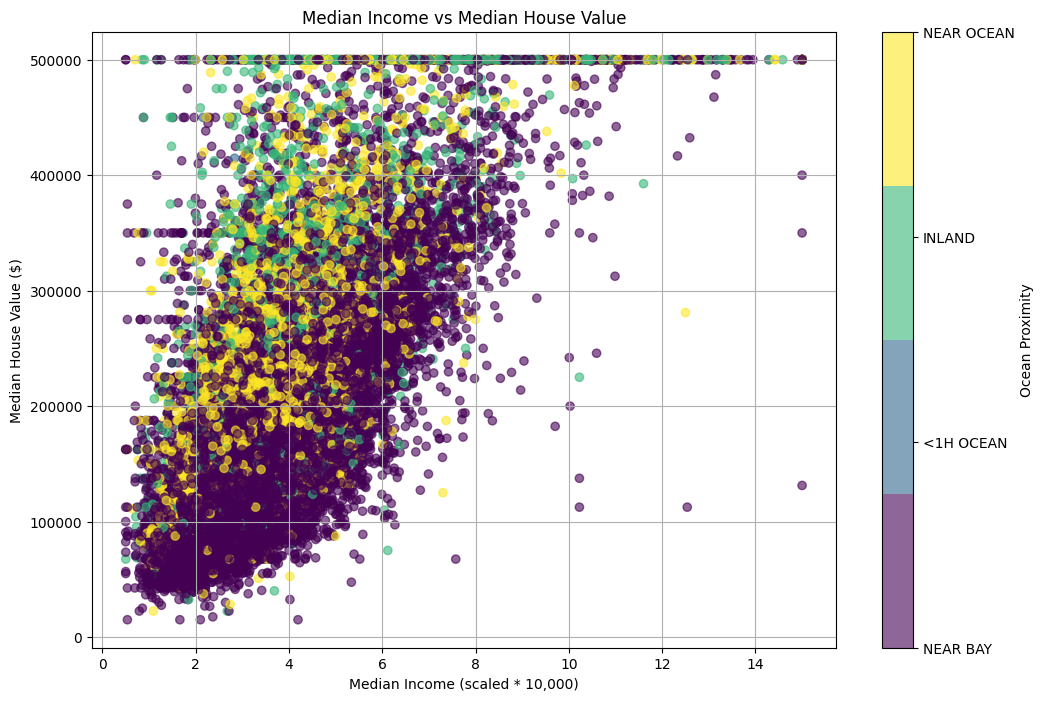

In [15]:
# Skapa en ny kolumn för färgläggning baserat på dummy-kolumnerna
df['ocean_proximity_code'] = (df.filter(like='ocean_proximity').values.argmax(axis=1))

# Mappning från kod till kategorinamn
categories = ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN']
cmap = plt.get_cmap('viridis', len(categories))

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['median_income'], df['median_house_value'], 
                      c=df['ocean_proximity_code'], cmap=cmap, alpha=0.6)
cbar = plt.colorbar(scatter, ticks=range(len(categories)))
cbar.ax.set_yticklabels(categories)
cbar.set_label('Ocean Proximity')
plt.xlabel('Median Income (scaled * 10,000)')
plt.ylabel('Median House Value ($)')
plt.title('Median Income vs Median House Value')
plt.grid(True)
plt.show()